In [1]:
from pydataset import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


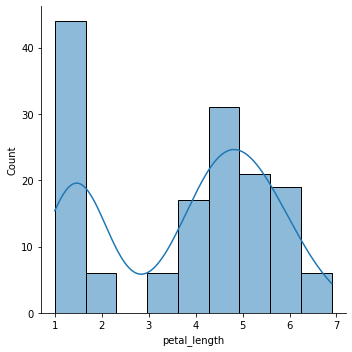

In [15]:
sns.displot(data = iris,
            x = 'petal_length', kde = True)

In [9]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

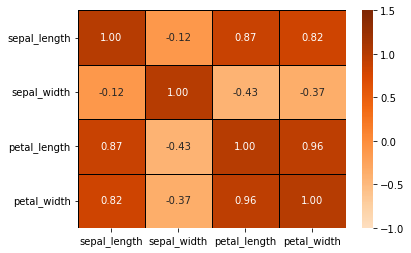

In [11]:
sns.heatmap(iris.corr(), 
            cmap = 'Oranges', 
            annot = True, 
            fmt = '0.2f', 
            center = 0,
            vmin = -1, 
            vmax = 1.5,
            linewidth = 1,
            linecolor = 'k')

# sns.relplot(data = iris, x = 'petal_length', 
# y = 'petal_width',
# hue = 'species')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

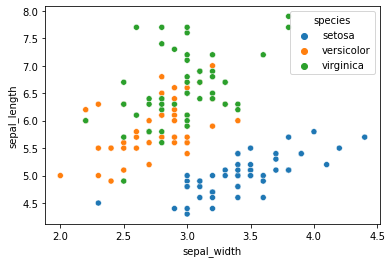

In [14]:
sns.scatterplot(data = iris, x = 'sepal_width',
            y = 'sepal_length', hue = 'species')

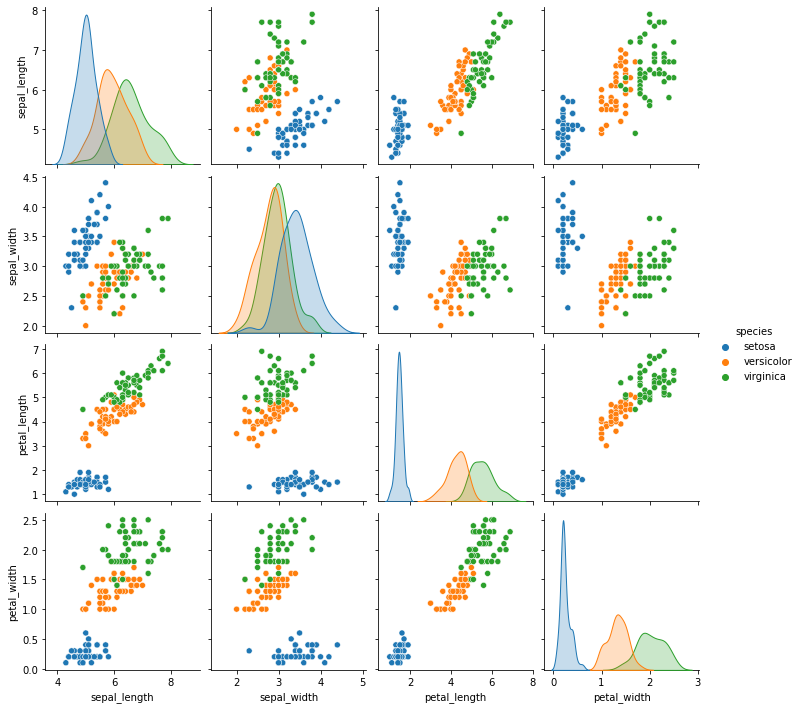

In [16]:
sns.pairplot(iris, hue = 'species')

# Exercise 2

In [19]:
anscombe = sns.load_dataset('anscombe')

In [20]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [21]:
data_set= anscombe.groupby('dataset')[['x','y']].agg(['median','mean'])


In [22]:
data_set

x           y          
        median mean median      mean
dataset                             
I          9.0  9.0   7.58  7.500909
II         9.0  9.0   8.14  7.500909
III        9.0  9.0   7.11  7.500000
IV         8.0  9.0   7.04  7.500909

In [23]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

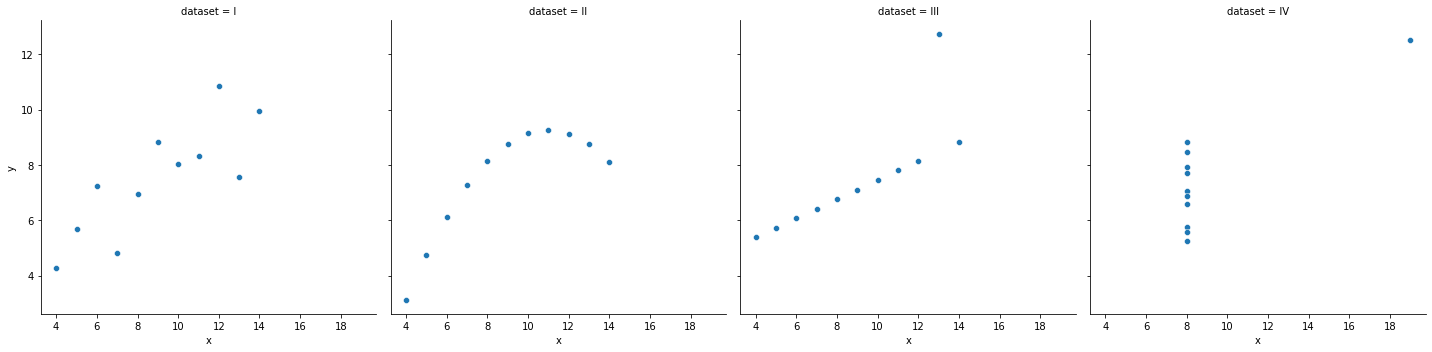

In [25]:
sns.relplot(data = anscombe, x= 'x', y = 'y', col = 'dataset')

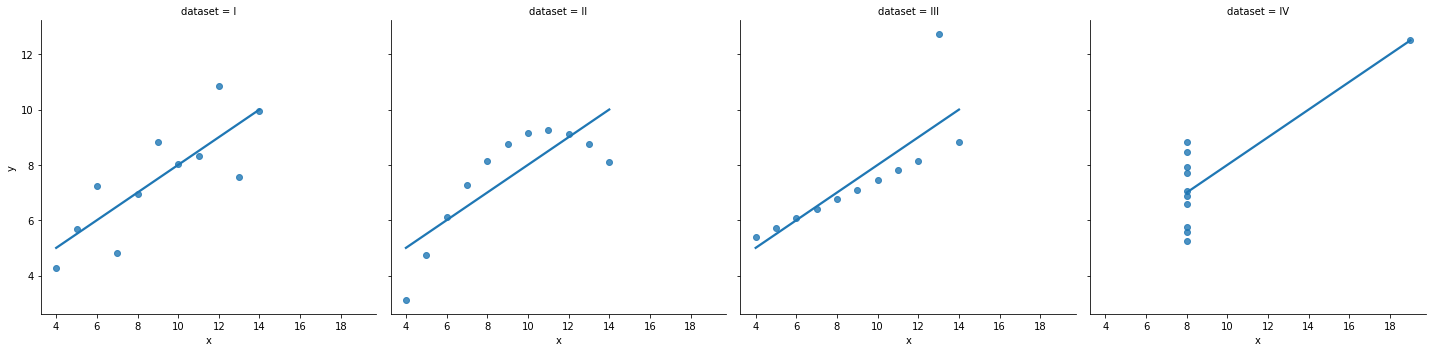

In [27]:
# outliers and their impact
sns.lmplot(data = anscombe, x='x', y='y',
           col = 'dataset', ci = 0)

# using linear regression model 'lmplot'

In [28]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [29]:
InsectSprays.head(5)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


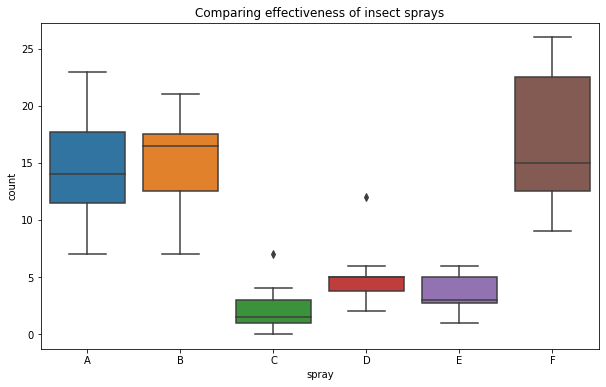

In [35]:
# spray type is categorical vs insect type which is numeric

plt.figure(figsize = (10, 6))
sns.boxplot(data = InsectSprays, y = 'count', x='spray')
plt.title('Comparing effectiveness of insect sprays')
plt.show()

In [36]:
swiss = data('swiss')
data('swiss', show_doc =True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [37]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [38]:
swiss['is_catholic'] = swiss.Catholic > 50

In [39]:
swiss.head(2)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

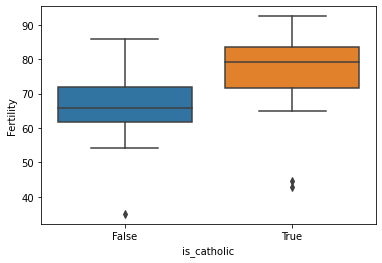

In [40]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

# does wether or not a province is catholic influence fertility

In [44]:
swiss.groupby('is_catholic').Fertility.mean()

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

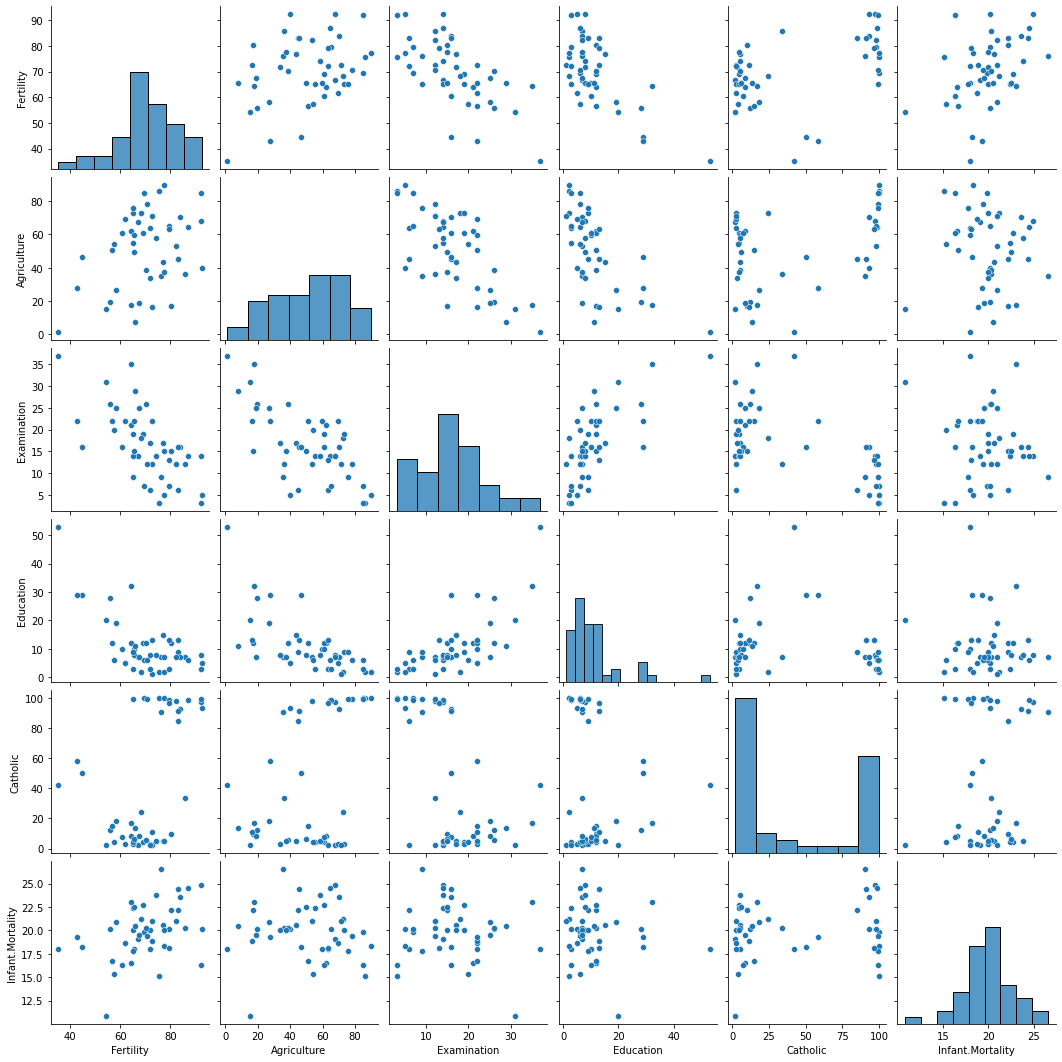

In [42]:
sns.pairplot(data = swiss.iloc[:, :-1])

In [47]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

In [48]:
from env import get_db_url

In [49]:
sleepstudy = data('sleepstudy')

In [53]:
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

In [55]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

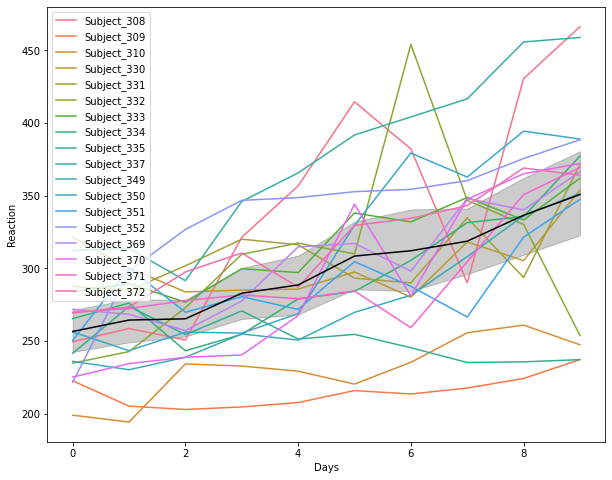

In [56]:
plt.figure(figsize=(10,8))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black')